# To Make Live Predictions Using a Trained AlexNet CNN

In [4]:
import random, os, sys

from PIL import Image
import PIL

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.metrics import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.backend import clear_session
from tensorflow.keras import models
import pickle


from skimage import io, color, filters
from skimage.transform import resize

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')
plt.rcParams.update({'font.size': 20})

!pip install -q pyyaml h5py

In [3]:
# Run this ONLY if I want to clear the entire session from memory *****

clear_session()

## Model Architecture:

In [4]:
def build_alexnet():
    model = Sequential()
    
    model.add(Conv2D(96, (11,11), strides=(4,4), activation='relu', 
                     padding='VALID'))
    
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='VALID',
                          input_shape=(27,27,1)))
    
    model.add(Conv2D(256, (5,5), strides=(1,1), activation='relu',
                    padding='SAME', input_shape=(27,27)))
    
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='VALID',
                           input_shape=(13,13)))
    
    model.add(Conv2D(384, (3,3), input_shape=(13,13), strides=(1,1),
                     activation='relu', padding='SAME'))
    
    model.add(Conv2D(384, (3,3), input_shape=(13,13), strides=(1,1), activation='relu',
                    padding='SAME'))
    
    model.add(Conv2D(256, (3,3), input_shape=(13,13), strides=(1,1), activation='relu',
                    padding='SAME'))
    
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='VALID'))
    
    model.add(Flatten())
    
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', 
                  optimizer=Adam(lr=0.0001), 
                  metrics=[BinaryCrossentropy(), 'accuracy'])
    
    return model

## Building ImageDataGenerators and Fitting

In [5]:
alexnet = build_alexnet()

batch_size=32
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.025, patience=25)

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

# train_datagen = ImageDataGenerator(rescale=1./255,
#                             shear_range=0.2,
#                             zoom_range=0.2,
#                             horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # no transformations for test

train_generator = train_datagen.flow_from_directory('data/archive/train_another', batch_size=batch_size,
                                    shuffle=True, class_mode='binary', target_size=(224,224)) #128,128

validation_generator = test_datagen.flow_from_directory('data/archive/validation_another', batch_size=batch_size,
                                         shuffle=True, class_mode='binary', target_size=(224,224)) #128,128


hist1 = alexnet.fit(train_generator, epochs=200,
                         validation_data=validation_generator, callbacks=[es])

score = alexnet.evaluate(validation_generator, verbose=0)

print('Loss:',score[1])
print('Validation Accuracy:',score[2])

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/200
313/313 [==============================] - 32s 93ms/step - loss: 0.5640 - binary_crossentropy: 0.5640 - accuracy: 0.6753 - val_loss: 0.3469 - val_binary_crossentropy: 0.3469 - val_accuracy: 0.8910
Epoch 2/200
313/313 [==============================] - 14s 45ms/step - loss: 0.3276 - binary_crossentropy: 0.3276 - accuracy: 0.8679 - val_loss: 0.2341 - val_binary_crossentropy: 0.2341 - val_accuracy: 0.9125
Epoch 3/200
313/313 [==============================] - 14s 45ms/step - loss: 0.2539 - binary_crossentropy: 0.2539 - accuracy: 0.9015 - val_loss: 0.1969 - val_binary_crossentropy: 0.1969 - val_accuracy: 0.9145
Epoch 4/200
313/313 [==============================] - 14s 43ms/step - loss: 0.1980 - binary_crossentropy: 0.1980 - accuracy: 0.9249 - val_loss: 0.2674 - val_binary_crossentropy: 0.2674 - val_accuracy: 0.9005
Epoch 5/200
313/313 [==============================] - 14s 44ms/step - loss: 0.

Epoch 40/200
313/313 [==============================] - 14s 43ms/step - loss: 0.0121 - binary_crossentropy: 0.0121 - accuracy: 0.9957 - val_loss: 0.1632 - val_binary_crossentropy: 0.1632 - val_accuracy: 0.9635
Loss: 0.1632228046655655
Validation Accuracy: 0.9635000228881836


NameError: name 'hist1' is not defined

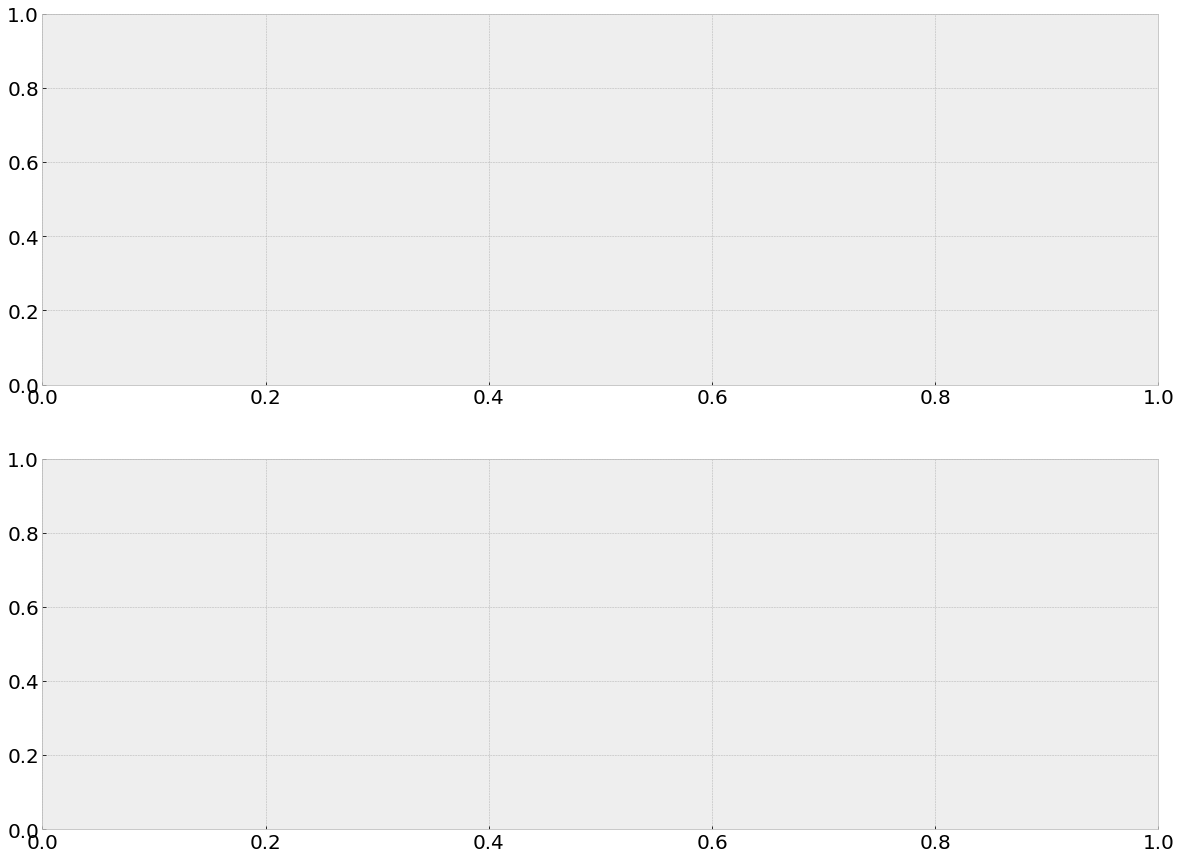

In [3]:
fig, ax = plt.subplots(2, 1, figsize=(20,15))

accuracy = hist1.history['accuracy']
val_accuracy = hist1.history['val_accuracy']

loss = hist1.history['loss']
val_loss = hist1.history['val_loss']

ax[0].plot(accuracy, label='Accuracy')
ax[0].plot(val_accuracy, label='Val Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_title('AlexNet CNN: Accuracy')
ax[0].legend();


ax[1].plot(loss, label='Loss')
ax[1].plot(val_loss, label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('AlexNet CNN: Loss')
ax[1].legend()

plt.tight_layout();

In [7]:
# saving the model

alexnet.save('alexnet1.h5')

In [9]:
alexnet = models.load_model('alexnet1.h5')

ValueError: The channel dimension of the inputs should be defined. Found `None`.

## Using the Trained Model To Make Some Predictions:

In [ ]:
class Predict():
    
    def __init__(self, x, path):
        self.x = x
        self.path = path
        
    def predict_and_display(self):
        predict_datagent = ImageDataGenerator(rescale=.1/255)
        
        prediction_generator = predict_datagen.flow_from_directory(path,
                                    batch_size=1), shuffle=True, class_mode='binary',
                                    target_size=(224,224), color_mode='rgb')
        
        
    


test_path = 'data/archive/test'

def predict_and_display(x, path):
    predict_datagen = ImageDataGenerator(rescale=1./255)
    
    prediction_generator = predict_datagen.flow_from_directory(path, batch_size=1,
                                         shuffle=True, class_mode='binary', target_size=(224,224), color_mode='rgb')
    
    

In [8]:
# predict_datagen = ImageDataGenerator(rescale=1./255)

# prediction_generator = predict_datagen.flow_from_directory('data/archive/test', batch_size=1,
#                                          shuffle=True, class_mode='binary', target_size=(224,224), color_mode='rgb')

Found 2000 images belonging to 2 classes.


In [38]:
def predict_and_display(x):
    io.imshow(x[0].reshape(224,224,3))
    return (alexnet.predict(x) > 0.5).astype("int32");

In [72]:
image, label = next(prediction_generator)

(array([[0]], dtype=int32), array([0.], dtype=float32))

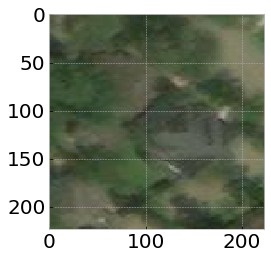

In [73]:
predict_and_display(image), label

## IT WORKS!